In [1]:
# Import necessary libraries from PySpark
from pyspark.sql import SparkSession
from pyspark.sql.functions import flatten, udf, col
from pyspark.sql.types import BooleanType

# Create a SparkSession with the specified configurations
# - Set the application name to "Fraud"
# - Configure the Spark JARs path for BigQuery integration
# - Set the master to 'yarn'
spark = SparkSession.builder \
    .appName("Fraud") \
    .config("spark.jars", "gs://spark-lib/bigquery/spark-bigquery-latest.jar") \
    .master('yarn') \
    .getOrCreate()

# Read data from BigQuery into a DataFrame
# - The data is loaded from the 'fraud-detection-406618.frauddatset.fraud' table
df = spark.read \
    .format("bigquery") \
    .load('fraud-detection-406618.frauddatset.fraud')

# Display the first 10 rows of the DataFrame
df.show(10)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/01 04:11:46 INFO SparkEnv: Registering MapOutputTracker
23/12/01 04:11:46 INFO SparkEnv: Registering BlockManagerMaster
23/12/01 04:11:46 INFO SparkEnv: Registering BlockManagerMasterHeartbeat
23/12/01 04:11:47 INFO SparkEnv: Registering OutputCommitCoordinator


+----+-------+---------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
|step|   type|   amount|nameOrig|oldbalanceOrg|newbalanceOrig|nameDest|oldbalanceDest|newbalanceDest|isFraud|isFlaggedFraud|
+----+-------+---------+--------+-------------+--------------+--------+--------------+--------------+-------+--------------+
| 256|  DEBIT|  2461.16|  _RARE_|     39938.87|      36139.97|  _RARE_|     612463.78|     645534.03|      0|             0|
| 256|  DEBIT|  2514.11|  _RARE_|          0.0|           0.0|  _RARE_|    1203056.59|    1301508.71|      0|             0|
| 256|  DEBIT|  10629.3|  _RARE_|    272494.17|      280024.1|  _RARE_|     755958.03|     830078.29|      0|             0|
| 256|  DEBIT|  3688.57|  _RARE_|          0.0|           0.0|  _RARE_|     547188.76|      532266.6|      0|             0|
| 256|  DEBIT|  3970.82|  _RARE_|      2997.17|           0.0|  _RARE_|     607970.19|     610935.74|      0|             0|


In [20]:
# Display the data types of each column in the DataFrame
df.dtypes

[('step', 'bigint'),
 ('type', 'string'),
 ('amount', 'double'),
 ('nameOrig', 'string'),
 ('oldbalanceOrg', 'double'),
 ('newbalanceOrig', 'double'),
 ('nameDest', 'string'),
 ('oldbalanceDest', 'double'),
 ('newbalanceDest', 'double'),
 ('isFraud', 'bigint'),
 ('isFlaggedFraud', 'bigint')]

In [21]:
# Convert the Spark DataFrame 'df' to a Pandas DataFrame 'Data'
Data = df.toPandas()

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/opt/conda/miniconda3/lib/python3.10/site-packages/py4j/clientserver.py", line 516, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/miniconda3/lib/python3.10/site-packages/py4j/java_gateway.py", line 1038, in send_command
    response = connection.send_command(command)
  File "/opt/conda/miniconda3/lib/python3.10/site-packages/py4j/clientserver.py", line 539, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while sending or receiving


Py4JError: An error occurred while calling o67.sessionState

In [4]:
# Display the first few rows of the Pandas DataFrame 'Data'
Data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,256,DEBIT,2461.16,_RARE_,39938.87,36139.97,_RARE_,612463.78,645534.03,0,0
1,256,DEBIT,2514.11,_RARE_,0.00,0.00,_RARE_,1203056.59,1301508.71,0,0
2,256,DEBIT,10629.30,_RARE_,272494.17,280024.10,_RARE_,755958.03,830078.29,0,0
3,256,DEBIT,3688.57,_RARE_,0.00,0.00,_RARE_,547188.76,532266.60,0,0
4,256,DEBIT,3970.82,_RARE_,2997.17,0.00,_RARE_,607970.19,610935.74,0,0


In [5]:
# Drop duplicate rows from the Pandas DataFrame 'Data'
Data = Data.drop_duplicates()

In [6]:
# Display the data types of each column in the Pandas DataFrame 'Data'
Data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [7]:
# Check for outliers in the 'amount' column using Z-score
# - Filter rows where the Z-score of 'amount' is less than 3
from scipy.stats import zscore
Data = Data[(zscore(Data['amount']) < 3)]

# Display the first few rows of the Pandas DataFrame 'Data' after outlier removal
Data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,256,DEBIT,2461.16,_RARE_,39938.87,36139.97,_RARE_,612463.78,645534.03,0,0
1,256,DEBIT,2514.11,_RARE_,0.00,0.00,_RARE_,1203056.59,1301508.71,0,0
2,256,DEBIT,10629.30,_RARE_,272494.17,280024.10,_RARE_,755958.03,830078.29,0,0
3,256,DEBIT,3688.57,_RARE_,0.00,0.00,_RARE_,547188.76,532266.60,0,0
4,256,DEBIT,3970.82,_RARE_,2997.17,0.00,_RARE_,607970.19,610935.74,0,0


In [8]:
# Display the shape (number of rows and columns) of the Pandas DataFrame 'Data'
Data.shape

(260013, 11)

In [9]:
# Display the number of unique values in each column of the Pandas DataFrame 'Data'
Data.nunique()

step                 328
type                   5
amount            257770
nameOrig               1
oldbalanceOrg     172998
newbalanceOrig    112861
nameDest            7954
oldbalanceDest    153442
newbalanceDest    164430
isFraud                2
isFlaggedFraud         2
dtype: int64

In [10]:
# Check and display the number of null values in each column of the Pandas DataFrame 'Data'
print(Data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


In [11]:
# Display the counts of unique values in the 'type' column of the Pandas DataFrame 'Data'
print(Data['type'].value_counts())

CASH_OUT    95490
PAYMENT     84661
CASH_IN     56968
TRANSFER    21199
DEBIT        1695
Name: type, dtype: int64


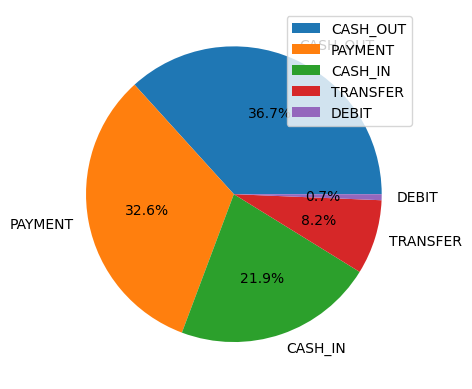

In [12]:
# Import necessary plotting libraries
import matplotlib.pyplot as plt
import numpy as np

# Extract and visualize the distribution of values in the 'type' column
type = Data["type"].value_counts()
transactions = type.index
quantity = type.values

y = quantity
mylabels = transactions

# Plot a pie chart to show the distribution of transaction types
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.legend(loc="upper right")
plt.show()


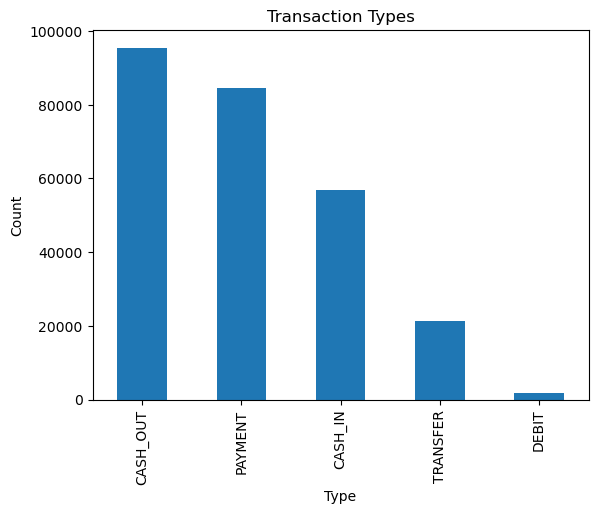

In [13]:
# Create a bar chart to visualize the counts of each transaction type in the 'type' column
Data["type"].value_counts().plot(kind="bar")
plt.title("Transaction Types")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

In [14]:
# Import pandas library for data manipulation and analysis
import pandas as pd

# Adjust column names based on your actual DataFrame
correlation = Data.corr()

# Extract and print the correlation of each column with the target variable 'isFraud'
correlation_with_target = correlation["isFraud"].sort_values(ascending=False)
print(correlation_with_target)



isFraud           1.000000
amount            0.025744
isFlaggedFraud    0.002335
step              0.000337
newbalanceDest   -0.000843
oldbalanceOrg    -0.001082
oldbalanceDest   -0.001908
newbalanceOrig   -0.003622
Name: isFraud, dtype: float64


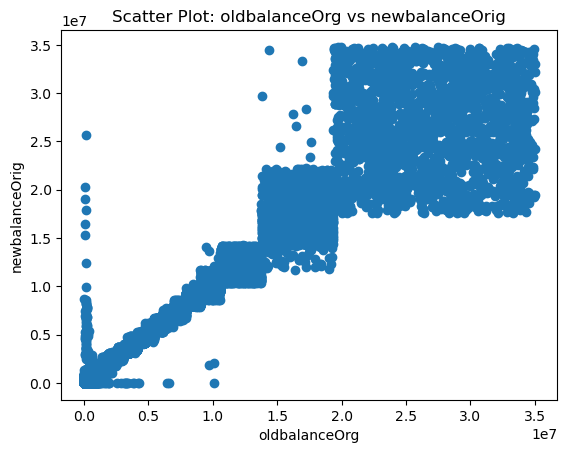

In [15]:
# Create a scatter plot to visualize the relationship between 'oldbalanceOrg' and 'newbalanceOrig'
import matplotlib.pyplot as plt

plt.scatter(Data["oldbalanceOrg"], Data["newbalanceOrig"])
plt.title("Scatter Plot: oldbalanceOrg vs newbalanceOrig")
plt.xlabel("oldbalanceOrg")
plt.ylabel("newbalanceOrig")
plt.show()

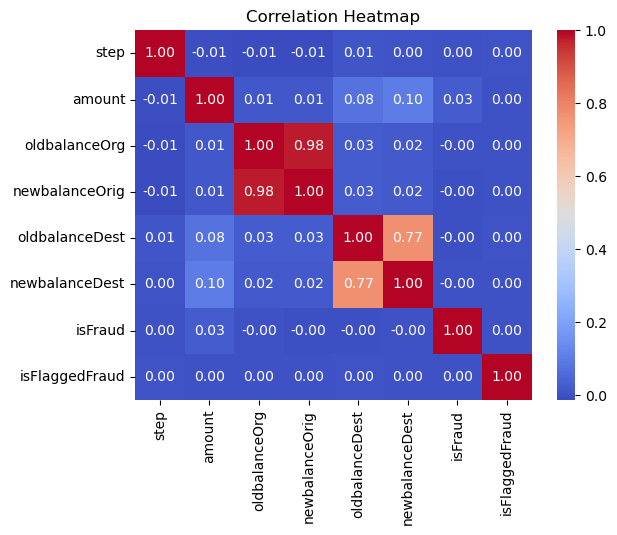

In [16]:
# Create a heatmap to visualize the correlation matrix
import seaborn as sns

# Calculate the correlation matrix
correlation_matrix = Data.corr()

# Create a heatmap with annotations, using the 'coolwarm' colormap and displaying values with two decimal places
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#This visualization helps you understand the correlation between numeric columns in your dataset. 
#The values range from -1 to 1, where -1 indicates a strong negative correlation, 0 indicates no correlation, 
#and 1 indicates a strong positive correlation.

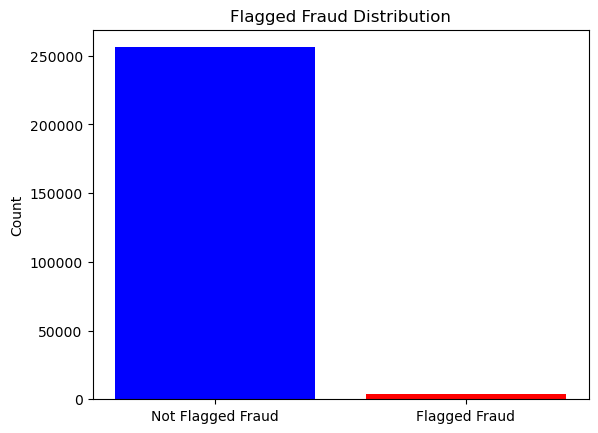

In [17]:
# Create a bar chart to visualize the distribution of 'isFlaggedFraud'
import matplotlib.pyplot as plt

# Extract counts of 'Not Flagged Fraud' and 'Flagged Fraud'
flagged_counts = Data["isFlaggedFraud"].value_counts()
labels = ['Not Flagged Fraud', 'Flagged Fraud']

# Plot a bar chart with custom colors for better visibility
plt.bar(labels, flagged_counts, color=['blue', 'red'])
plt.title("Flagged Fraud Distribution")
plt.ylabel("Count")
plt.show()

#This bar chart shows the distribution of flagged fraud transactions, 
#providing insights into how many transactions are flagged as fraud.


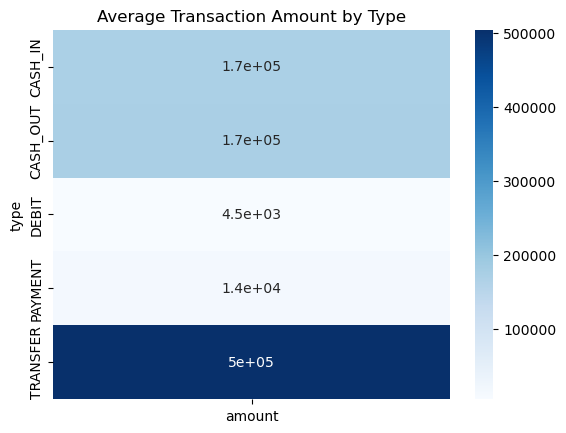

In [18]:
# Create a heatmap to visualize the average transaction amount by transaction type
import seaborn as sns

# Create a pivot table with the average transaction amount for each transaction type
type_amount_pivot = Data.pivot_table(values='amount', index='type', aggfunc='mean')

# Create a heatmap with annotations using the 'Blues' colormap
sns.heatmap(type_amount_pivot, annot=True, cmap='Blues')
plt.title("Average Transaction Amount by Type")
plt.show()

#This heatmap can help you identify which transaction types have higher or lower average amounts, 
#providing insights into the monetary scale of different transaction types.

<AxesSubplot:>

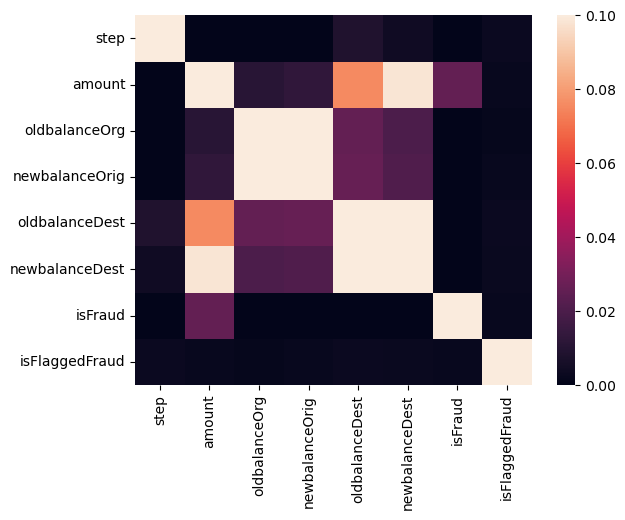

In [19]:
# Create a heatmap to visualize the correlation matrix with a specified color range
import seaborn as sns

# Use seaborn to create a heatmap of the correlation matrix
# Set vmin and vmax to define the color range (in this case, 0 to 0.1)
sns.heatmap(correlation, vmin=0, vmax=0.1)
